#**Project 3: Airbnb Data Analysis: Exploring Property Trends and Pricing Patterns**

----
##Part 1. Data Analysis

----
##Project Overview:

This project focuses on analyzing Airbnb data to gain insights into property trends and pricing patterns. We will perform various tasks, including calculating property counts, identifying neighborhood groups with the highest and lowest prices, finding top hosts, and exploring the distribution of room types. Visualizations and data analysis will help reveal valuable information about Airbnb listings in New York City.

----

**Outlined Objectives**

1. Calculate the number of properties in each neighborhood group.

2. Determine which neighborhood group has the highest prices and use a bar chart to visualize this for all neighborhood groups.

3. Identify which neighborhood group has the lowest prices and use a bar chart to visualize this for all neighborhood groups.

4. Find the highest and lowest price Airbnb listings in each neighborhood group.

5. Identify the host with the highest count of properties.

6. Determine the most expensive and cheapest neighborhoods and create a top 10 bar chart for comparison.

7. Count the different types of room_type and create a pie chart to display the percentage of each room type in the overall dataset.

8. Create scatter plots showing the relationship between longitude and latitude for different neighborhood groups.

9. Create scatter plots showing the relationship between longitude and latitude for different room types.

10. Generate bar charts comparing room types and neighborhood groups based on their mean, highest, and lowest prices.

11. Create a bar chart that compares room types and neighborhood groups based on their counts.

----

Importing necessary libraries & reading the dataset file in dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '/content/AB_NYC_2019.csv'
df_raw = pd.read_csv(path)

In [4]:
df_raw.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [5]:
df_raw.tail(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
df_raw.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
df_raw.shape

(48895, 16)

In [9]:
df_raw.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


----
#**Data PreProcessing**

----

The columns 'name', 'host_name', 'last_review' & 'reviews_per_month' have null values.

Since, the 'name' of the busines and 'host_name' would not be much relevant for machine learning analysis anyways, we don't delete them.

We will use the appoach of changing these null values with a string 'Unnamed Business' & for host_name to its equivalent host_id.

We can use SimpleImputer method from sklearn library for implementation on 'name' column.

In [10]:
from sklearn.impute import SimpleImputer

imputerName = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unnamed Business')

# Fit and transform the 'name' column
df_raw['name'] = imputerName.fit_transform(df_raw[['name']])

We can use panda function 'fillna' to replace the null values in host_name column to its equivalent host_id.

In [11]:
df_raw['host_name'].fillna(df_raw['host_id'], inplace=True)

In [12]:
df_raw.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

To address the issue of missing values in the 'last_review' column, given their substantial occurrence, we have chosen not to remove these rows from the dataset. Instead, we will substitute the absent dates with a predefined default date, '1999-12-31'. This approach enables us to retain the dataset's completeness while also providing a clear indication of the absence of recorded review dates. Additionally, it simplifies the process of identifying rows with missing values for future reference.

In [13]:
from sklearn.impute import SimpleImputer

imputerLastReview = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = '1999-12-31')
imputerReviewsPerMonth = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)

df_raw['last_review'] = imputerLastReview.fit_transform(df_raw[['last_review']])
df_raw['reviews_per_month'] = imputerReviewsPerMonth.fit_transform(df_raw[['reviews_per_month']])

Moreover, in the context of the 'reviews_per_month' column, missing values can be interpreted as indicating the absence of reviews up to that point. One approach involves identifying properties with null values in the 'reviews_per_month' column and checking if the same 'host_id' has non-null values for other properties. We can calculate the mean of 'reviews_per_month' for properties with the same 'host_id' and then insert this calculated mean value to ensure result consistency.

If the same host_id has no 'non-null' values, we wil set it to 0 in that case.

In [14]:
mean_reviews_by_host = df_raw.groupby('host_id')['reviews_per_month'].mean()
missing_reviews = df_raw['reviews_per_month'].isnull()
df_raw.loc[missing_reviews, 'reviews_per_month'] = df_raw.loc[missing_reviews, 'host_id'].apply(lambda x: mean_reviews_by_host.get(x, np.nan))

In [15]:
imputerReviewsPerMonth = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
df_raw['reviews_per_month'] = imputerReviewsPerMonth.fit_transform(df_raw[['reviews_per_month']])

In [16]:
df_raw.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

To enhance data clarity, we will convert the data type of the 'last_review' column from string object to datetime.

In [17]:
df_raw.loc[: , 'last_review'] = pd.to_datetime(df_raw['last_review'])

<ipython-input-17-69df3448da79>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_raw.loc[: , 'last_review'] = pd.to_datetime(df_raw['last_review'])


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

The DataFrame 'df' has been cleaned and will be used for subsequent data analysis.

In [19]:
df = df_raw

In [20]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1999-12-31,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


----

TASK 1: Calculate How many properties in each neighbourhood group

----

In [21]:
df.groupby(['neighbourhood_group'])['id'].count()

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

----
TASK2: Which Neighbour Hood Group Has highest prices use bar chart to show this for all neighbourhood groups

----

----

TASK3: Which Neighbourhood group has lowest prices use bar chart to show this for all neighbourhood groups.

----

In [22]:
df_task2 = df[['id','neighbourhood_group','price']]
priceByGroup = df_task2.groupby(['neighbourhood_group'])['price'].mean()

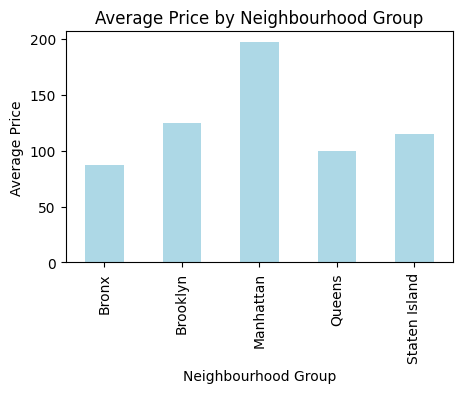

In [23]:
fig = plt.figure(figsize=(5, 3))

priceByGroup.plot(kind='bar', color='lightblue')

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title("Average Price by Neighbourhood Group")

plt.show()


The bar chart  illustrates that Manhattan has the highest average price among all the neighborhood groups while Bronx has the lowest average price.

----
TASK4: Highest and lowest price airbnb in each Neighbour Hood Group

----

In [24]:
df_task4 = df_task2

In [25]:
df_task4.sort_values(['price'], ascending = True, inplace = True)
lowest = df_task4.drop_duplicates(subset = ['neighbourhood_group'], keep = 'first')
highest = df_task4.drop_duplicates(subset = ['neighbourhood_group'], keep = 'last')

<ipython-input-25-9bf6bcd1712b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task4.sort_values(['price'], ascending = True, inplace = True)


In [26]:
print("Lowest : \n",lowest)
print()
print("Highest: \n",highest)

Lowest : 
              id neighbourhood_group  price
25796  20639914            Brooklyn      0
25433  20333471               Bronx      0
26259  20933849           Manhattan      0
22835  18490141              Queens     10
45646  34870577       Staten Island     13

Highest: 
              id neighbourhood_group  price
24477  19698169               Bronx   2500
22353  18051877       Staten Island   5000
17692  13894339            Brooklyn  10000
9151    7003697              Queens  10000
29238  22436899           Manhattan  10000


----
TASK5: Which Host has highest count of properties

----

In [27]:
df_task5 = df[['host_id', 'host_name', 'calculated_host_listings_count']]

In [28]:
df_task5.sort_values(['calculated_host_listings_count'], ascending = False, inplace = True)

<ipython-input-28-ef7a30211142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_task5.sort_values(['calculated_host_listings_count'], ascending = False, inplace = True)


In [29]:
print("The host with the highest count of properties:\n")
df_task5.iloc[0]

The host with the highest count of properties:



host_id                              219517861
host_name                         Sonder (NYC)
calculated_host_listings_count             327
Name: 39773, dtype: object

----
TASK6: Which neighbourhood is most expensive and cheapest top 10 barchart

----

In [30]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [31]:
df_task6 = df[['id','neighbourhood','price']]

In [32]:
average_per_neighbourhood = df_task6.groupby(['neighbourhood'])['price'].mean()
sorted = average_per_neighbourhood.sort_values(ascending = False)
top_ten = sorted.head(10)
print(top_ten)

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64


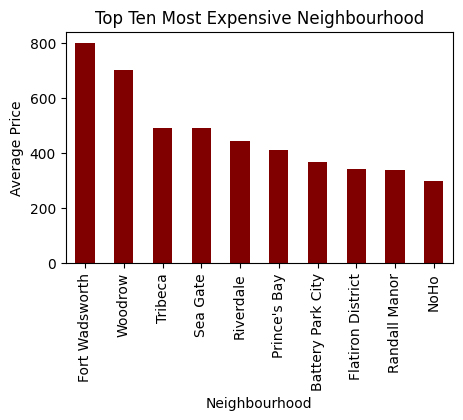

In [33]:
fig = plt.figure(figsize=(5, 3))

top_ten.plot(kind = 'bar', color = 'maroon')

plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title("Top Ten Most Expensive Neighbourhood")

plt.show()

In [34]:
bottom_ten = sorted.tail(10)
print(bottom_ten)

neighbourhood
Mount Eden        58.500000
Concord           58.192308
Grant City        57.666667
New Dorp Beach    57.400000
Bronxdale         57.105263
New Dorp          57.000000
Soundview         53.466667
Tremont           51.545455
Hunts Point       50.500000
Bull's Head       47.333333
Name: price, dtype: float64


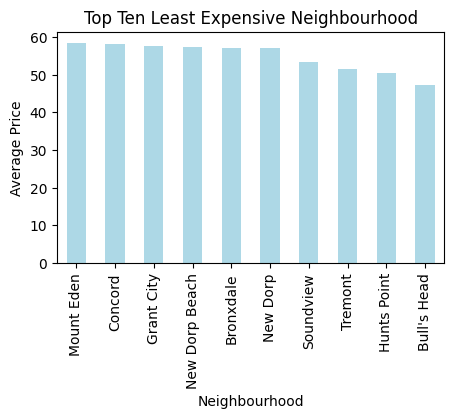

In [35]:
fig = plt.figure(figsize=(5, 3))

bottom_ten.plot(kind = 'bar', color = 'lightblue')

plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title("Top Ten Least Expensive Neighbourhood")


plt.show()

----
TASK7. Count different type of room_type and do a pie chart showing % of each room type in overall dataset


----

In [36]:
df_task7 = df[['room_type']]

In [37]:
room_type_counts = df_task7.value_counts().reset_index(name = 'count')

In [38]:
room_type_counts['percentage'] = (room_type_counts['count'] / room_type_counts['count'].sum()) * 100

In [39]:
room_type_counts

,room_type,count,percentage
0,Entire home/apt,25409,51.966459
1,Private room,22326,45.661111
2,Shared room,1160,2.372431


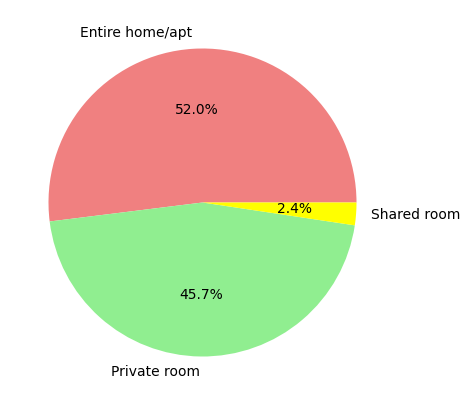

In [40]:
fig = plt.figure(figsize=(6, 5))

colors = ['lightcoral', 'lightgreen', 'yellow']

plt.pie(room_type_counts['percentage'], labels=room_type_counts['room_type'], colors=colors, autopct='%1.1f%%')

plt.show()


----

TASK 8. Scatter plot between longitutude and latitude for different neighbourhood groups


----

In [41]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [42]:
df_task8 = df[['neighbourhood_group','latitude', 'longitude']]

In [43]:
df_task8

,neighbourhood_group,latitude,longitude
0,Brooklyn,40.64749,-73.97237
1,Manhattan,40.75362,-73.98377
2,Manhattan,40.80902,-73.94190
3,Brooklyn,40.68514,-73.95976
4,Manhattan,40.79851,-73.94399
...,...,...,...
48890,Brooklyn,40.67853,-73.94995
48891,Brooklyn,40.70184,-73.93317
48892,Manhattan,40.81475,-73.94867
48893,Manhattan,40.75751,-73.99112


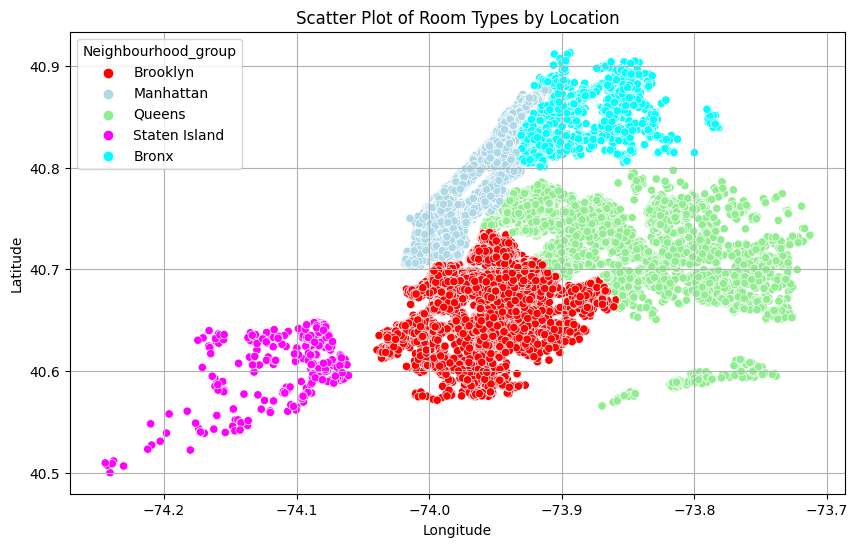

In [44]:
import seaborn as sns
plt.figure(figsize=(10, 6))

sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df_task8, palette={'Manhattan': 'lightblue',
                                                                                      'Brooklyn': 'red',
                                                                                      'Queens': 'lightgreen',
                                                                                      'Bronx': 'cyan',
                                                                                      'Staten Island': 'magenta'
                                                                                      })

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Room Types by Location')

plt.grid()
plt.legend(title='Neighbourhood_group')
plt.show()

----

TASK 9. scatter plot between longitutude and latitude for different room_types



----

In [45]:
df_task9 = df[['room_type','latitude', 'longitude']]

In [46]:
df_task9

,room_type,latitude,longitude
0,Private room,40.64749,-73.97237
1,Entire home/apt,40.75362,-73.98377
2,Private room,40.80902,-73.94190
3,Entire home/apt,40.68514,-73.95976
4,Entire home/apt,40.79851,-73.94399
...,...,...,...
48890,Private room,40.67853,-73.94995
48891,Private room,40.70184,-73.93317
48892,Entire home/apt,40.81475,-73.94867
48893,Shared room,40.75751,-73.99112


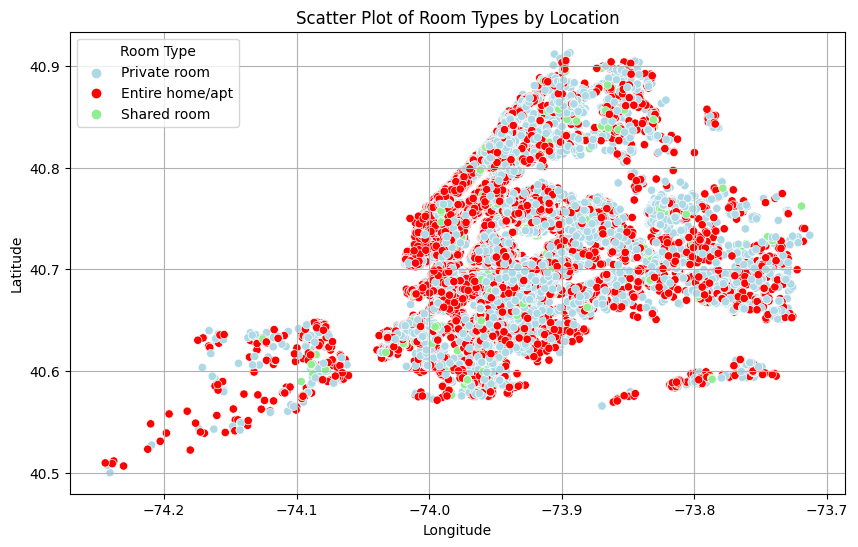

In [47]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df_task9, palette={'Private room': 'lightblue', 'Entire home/apt': 'red', 'Shared room': 'lightgreen'})

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Room Types by Location')

plt.grid()
plt.legend(title='Room Type')
plt.show()

----
TASK 10. Bar chart comparing room types and price for their mean, highest, and lowest prices.

----

In [48]:
df_task10 = df[['room_type', 'price']]

In [49]:
df_task10

,room_type,price
0,Private room,149
1,Entire home/apt,225
2,Private room,150
3,Entire home/apt,89
4,Entire home/apt,80
...,...,...
48890,Private room,70
48891,Private room,40
48892,Entire home/apt,115
48893,Shared room,55


In [50]:
# Group by 'room_type' and calculate statistics
room_type_group = df_task10.groupby('room_type')['price']

# Calculate mean, max, and min for each group
room_type_mean = room_type_group.mean().reset_index()
room_type_max = room_type_group.max().reset_index()
room_type_min = room_type_group.min().reset_index()

room_type_mean['Param'] = 'Mean'
room_type_max['Param'] = 'Highest'
room_type_min['Param'] = 'Lowest'

df_task10_final = pd.concat([room_type_mean, room_type_max, room_type_min])
print(df_task10_final)
print(type(df_task10_final))

         room_type         price    Param
0  Entire home/apt    211.794246     Mean
1     Private room     89.780973     Mean
2      Shared room     70.127586     Mean
0  Entire home/apt  10000.000000  Highest
1     Private room  10000.000000  Highest
2      Shared room   1800.000000  Highest
0  Entire home/apt      0.000000   Lowest
1     Private room      0.000000   Lowest
2      Shared room      0.000000   Lowest
<class 'pandas.core.frame.DataFrame'>


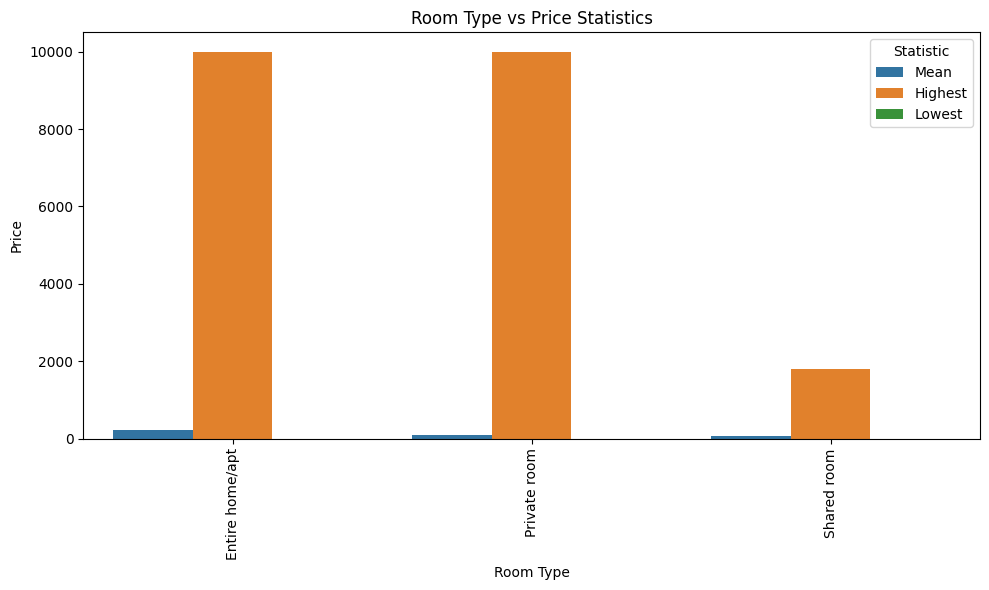

In [51]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', hue='Param', data=df_task10_final)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Room Type vs Price Statistics')
plt.legend(title='Statistic')

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

----
TASK 11. Bar chart comparing room types and neighbourhood_group for their count


---

For increased comprehensibility, 'df_task11' will only contain the necessary columns

In [52]:
df_task11 = df[['room_type', 'neighbourhood_group']]

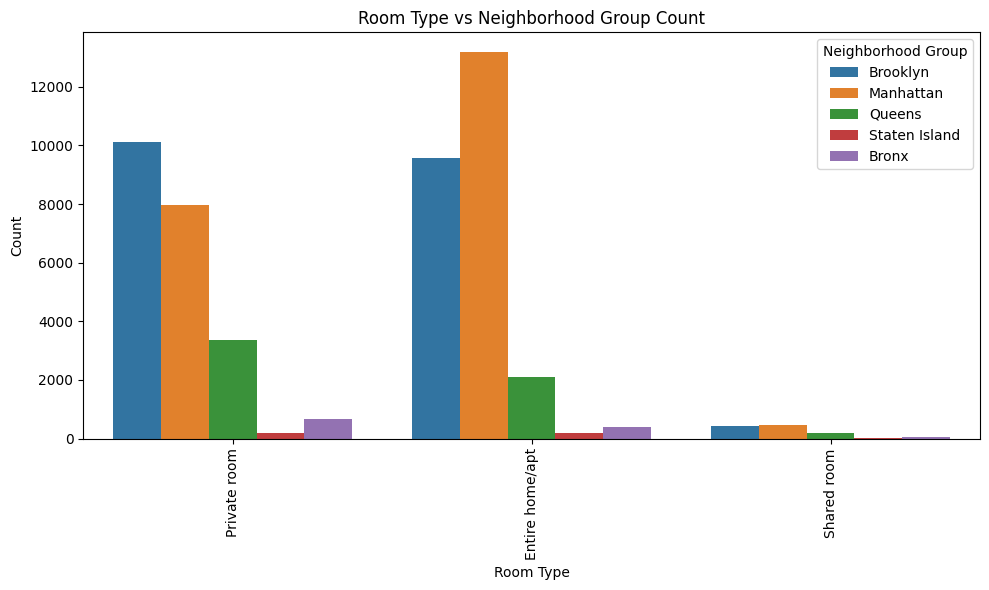

In [53]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.countplot(x='room_type', hue='neighbourhood_group', data=df_task11)

plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type vs Neighborhood Group Count')

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend(title='Neighborhood Group')

plt.tight_layout()
plt.show()

----